In [1]:
import dill
import gym

100%|██████████| 200000/200000 [00:26<00:00, 7673.12it/s]


[[0.5051815  0.39765667 0.40012617 0.39612059]
 [0.28036567 0.26445854 0.28661403 0.39994411]
 [0.35849757 0.35807645 0.35807362 0.36841638]
 [0.30363935 0.31223258 0.30255602 0.35828169]
 [0.51995441 0.2854655  0.27937779 0.27456689]
 [0.         0.         0.         0.        ]
 [0.30239309 0.29878295 0.31387755 0.29995982]
 [0.         0.         0.         0.        ]
 [0.28930308 0.35689852 0.32348456 0.55132286]
 [0.40080959 0.60439267 0.46779252 0.39053131]
 [0.57845366 0.50445744 0.48245236 0.47818016]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.49813614 0.53994045 0.71316156 0.47923815]
 [0.74139449 0.84568305 0.76808355 0.76279294]
 [0.         0.         0.         0.        ]]


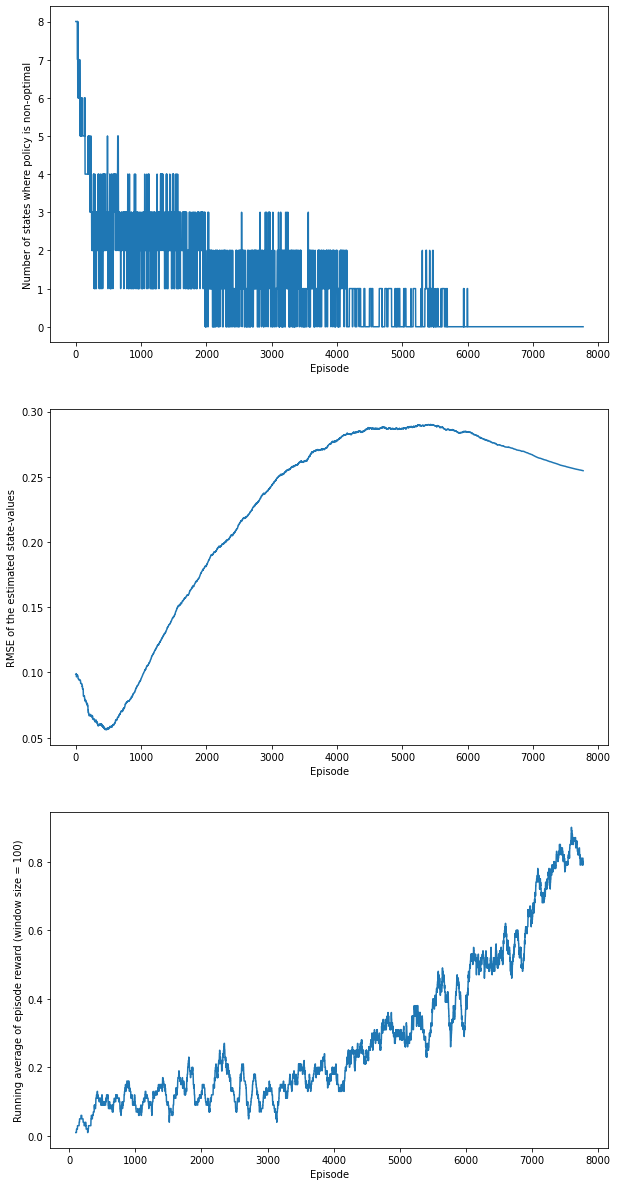

In [66]:
%run sarsa_training.py 4 200000

100%|██████████| 200000/200000 [00:45<00:00, 4365.13it/s]


[[0.80316051 0.80223798 0.80218604 0.80194395]
 [0.49985662 0.54503873 0.53368494 0.80071267]
 [0.69429423 0.7003412  0.68642476 0.79902717]
 [0.53834312 0.52341307 0.52736221 0.79815715]
 [0.80394923 0.49884663 0.50443272 0.51080852]
 [0.         0.         0.         0.        ]
 [0.48902109 0.21740761 0.49134899 0.25281316]
 [0.         0.         0.         0.        ]
 [0.46031162 0.50885618 0.59735469 0.80520692]
 [0.60128287 0.80615338 0.50600219 0.52810952]
 [0.74121151 0.51436445 0.45675876 0.4563839 ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.49271967 0.63721772 0.87131909 0.54153729]
 [0.83658063 0.93322616 0.88402923 0.869755  ]
 [0.         0.         0.         0.        ]]


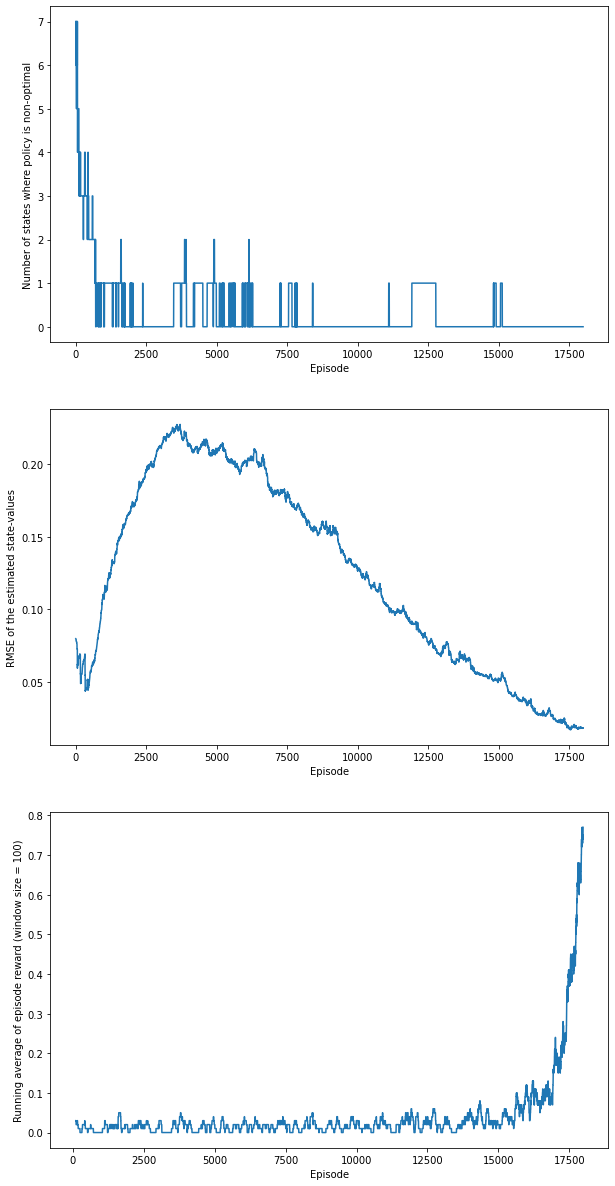

In [67]:
%run expected_sarsa_training.py 4 200000

100%|██████████| 200000/200000 [00:24<00:00, 8122.16it/s]


[[0.75376093 0.74925303 0.74899754 0.74916362]
 [0.50077773 0.50732355 0.48251498 0.74010483]
 [0.64881172 0.64674432 0.64242204 0.72780148]
 [0.45155244 0.45083995 0.49099023 0.72042343]
 [0.75467098 0.49197225 0.49241817 0.49581521]
 [0.         0.         0.         0.        ]
 [0.47344272 0.23755765 0.47410754 0.2588904 ]
 [0.         0.         0.         0.        ]
 [0.50702797 0.52680318 0.49341278 0.75895764]
 [0.49324376 0.76897532 0.52010165 0.52639944]
 [0.74472135 0.56063831 0.52684679 0.42397973]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.47639807 0.52008119 0.82188462 0.49360338]
 [0.80404639 0.91111947 0.89536635 0.84844588]
 [0.         0.         0.         0.        ]]


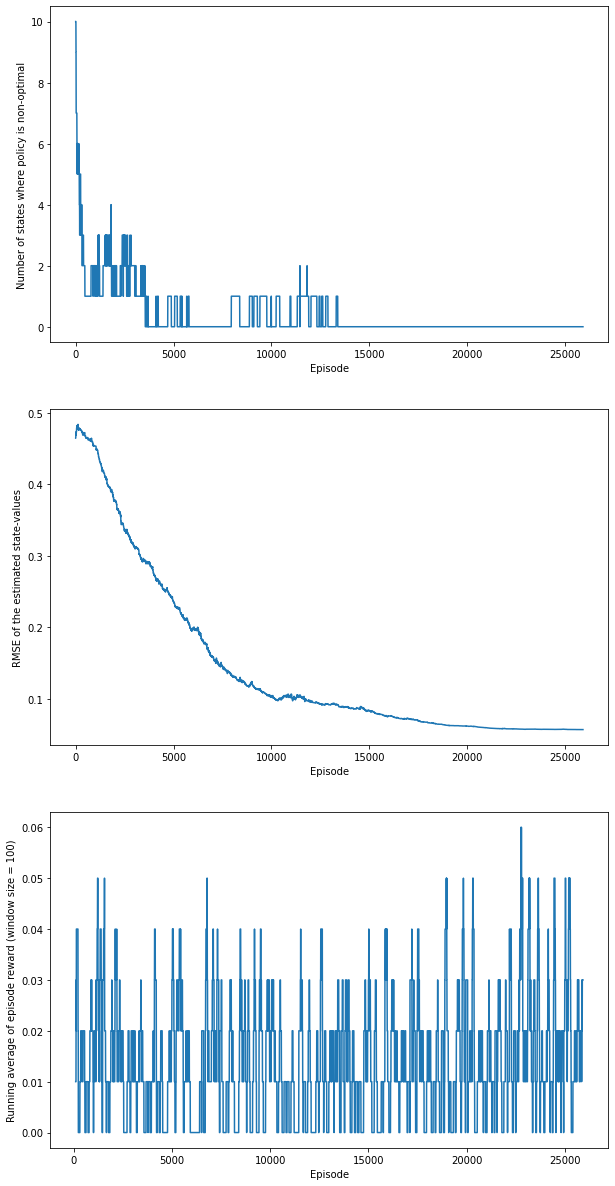

In [68]:
%run q_learning_training.py 4 200000

100%|██████████| 200000/200000 [00:27<00:00, 7338.64it/s]


[[0.83487601 0.83277284 0.83264493 0.83258919]
 [0.55567618 0.53508695 0.53644986 0.83062902]
 [0.74697848 0.74057642 0.74241174 0.82781362]
 [0.55733479 0.54169089 0.58025718 0.82633925]
 [0.83515971 0.56505482 0.56337759 0.56716308]
 [0.         0.         0.         0.        ]
 [0.54422382 0.26293112 0.48270293 0.25404789]
 [0.         0.         0.         0.        ]
 [0.56528059 0.54996227 0.57628347 0.83578681]
 [0.58682977 0.8361115  0.54432217 0.53393677]
 [0.77056432 0.52232492 0.50244146 0.48327624]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.56963771 0.60212795 0.89264165 0.57431858]
 [0.86529723 0.94681765 0.90825845 0.88266855]
 [0.         0.         0.         0.        ]]


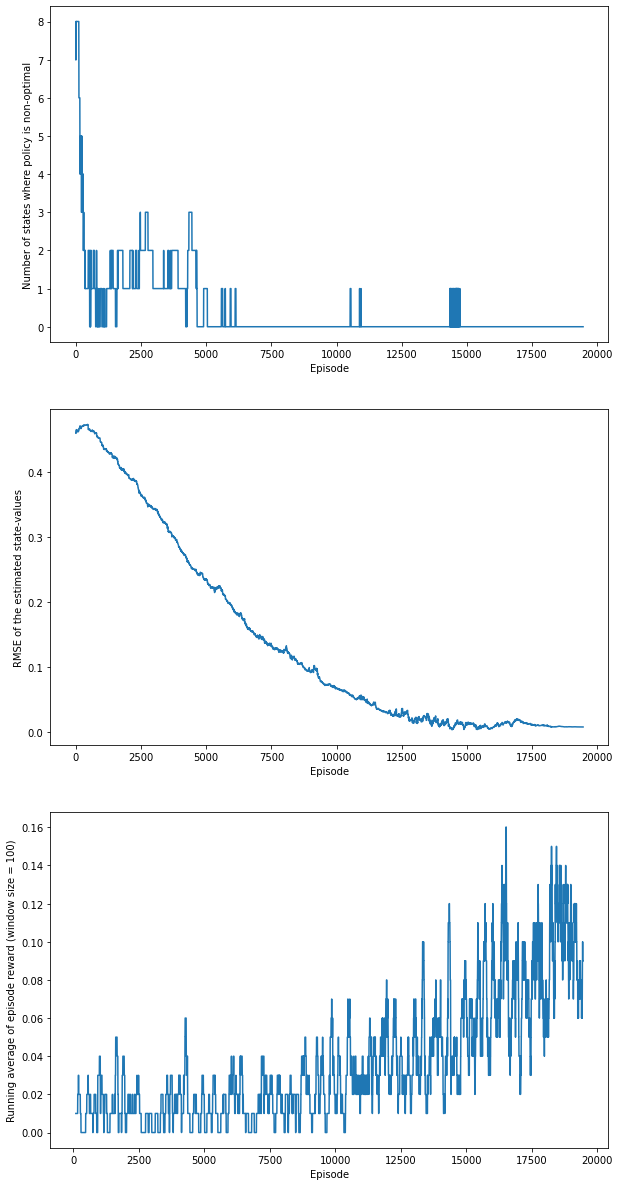

In [3]:
%run q_learning_eps_training.py 4 200000

In [4]:
# Fetch the agents that resulted from training in inference mode:
agents= {}
for alg in ('sarsa', 'expected_sarsa', 'q_learning', 'q_learning_eps'):
    with open(f'{alg}_agent.dill', 'rb') as fopen:
        agents[alg] = dill.load(fopen)
    agents[alg].set_mode('inference')

In [5]:
map_size = int(agents['sarsa'].env.observation_space.n **(1/2))

if map_size == 4:
    map_name = '4x4'
elif map_size == 8:
    map_name = '8x8'

env = gym.make('FrozenLake-v1', desc=None, map_name=map_name, is_slippery=True)
env._max_episode_steps = 10000

In [6]:
average_reward_per_episode = {}

for alg in ('sarsa', 'expected_sarsa', 'q_learning', 'q_learning_eps'):
    episodes = 0
    total_reward = 0
    observation = env.reset()
    while episodes < 10000:
        action = agents[alg].get_action(observation)
        observation, reward, done, info = env.step(action)
        total_reward += reward

        if done:
            observation = env.reset()
            episodes += 1

    average_reward_per_episode[alg] = total_reward / episodes

env.close()

In [7]:
average_reward_per_episode

{'sarsa': 0.8274,
 'expected_sarsa': 0.8213,
 'q_learning': 0.8186,
 'q_learning_eps': 0.8279}